<a href="https://colab.research.google.com/github/deeplearner2020/pytorch_learn/blob/master/load_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

In [2]:
print("Pytorch version", torch.__version__)
print("Torchvision version", torchvision.__version__)

Pytorch version 1.5.0+cu101
Torchvision version 0.6.0+cu101


In [3]:
use_pretrained = True
net = models.vgg16(pretrained = use_pretrained)
net.eval()
print(net)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [0]:
class BaseTransform():
      def __init__(self, resize, mean, std):
          self.base_transform = transforms.Compose([
               transforms.Resize(resize),
               transforms.CenterCrop(resize),
               transforms.ToTensor(),
               transforms.Normalize(mean, std)
          ])
      def __call__(self, img):
          return self.base_transform(img)


In [0]:
!ls

dog.jpg  sample_data


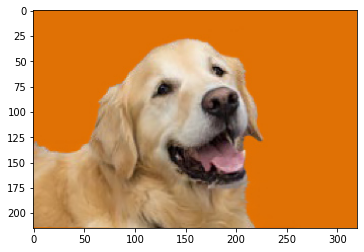

In [0]:
image_file_path = "dog.jpg"
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()


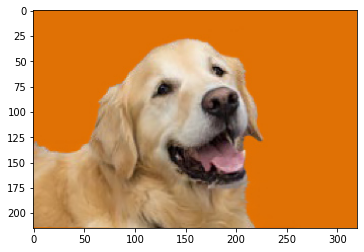

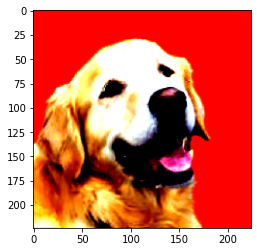

In [0]:
image_file_path = "dog.jpg"
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

resize = 224
mean = (0.485, 0.456, 0.406) 
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std) # Tạo ra transform
img_transformed = transform(img) #transform ảnh input

#(chanels, height, width) -> (height, width, channels) 
#clip (0,1)
img_transformed = img_transformed.numpy().transpose(1,2,0)
img_transformed = np.clip(img_transformed, 0, 1)

plt.imshow(img_transformed)
plt.show()